In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from dolfin import *
from mshr import *
import meshio
import numpy


Lets make a half-space with an amorphous meshing: Fenics has tools for all this, so I will steal them:
https://fenicsproject.org/docs/dolfin/1.6.0/python/programmers-reference/cpp/mesh/MeshFunction.html
https://fenicsproject.org/docs/dolfin/2016.2.0/python/demo/documented/subdomains/python/documentation.html?highlight=inside



Here are some examples from Dolfin

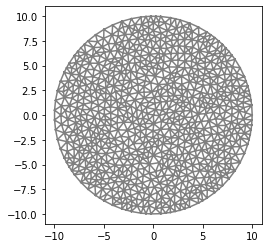

In [14]:
domain = Circle(Point(0, 0, 0), 10)
#domain = Rectangle(dolfin.Point(0.0, 0.0),dolfin.Point(1.0,1.0))
#mesh = UnitCubeMesh(1,1,1)

mesh = generate_mesh(domain, 20)
mesh.init()
plot(mesh)

In [16]:
dir(mesh)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_repr_html_',
 '_repr_svg_',
 'bounding_box_tree',
 'cell_name',
 'cell_orientations',
 'cells',
 'color',
 'coordinates',
 'data',
 'domains',
 'geometric_dimension',
 'geometry',
 'hash',
 'hmax',
 'hmin',
 'id',
 'init',
 'init_cell_orientations',
 'init_global',
 'label',
 'mpi_comm',
 'name',
 'num_cells',
 'num_edges',
 'num_entities',
 'num_entities_global',
 'num_faces',
 'num_facets',
 'num_vertices',
 'order',
 'ordered',
 'parameters',
 'rename',
 'rmax',
 'rmin',
 'rotate',
 'scale',
 'smooth',
 'smooth_boundary',
 'snap_boundary',
 'topology',
 'translate',
 'type',
 'ufl_cell',
 'ufl_coordinate_element',
 'ufl_domain',
 'u

Heres an example from Mshr

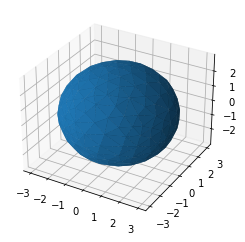

In [21]:
domain = Sphere(Point(0, 0, 0), 3)
mesh = generate_mesh(domain, 10)
mesh.init()
plot(mesh)

In [30]:
mesh.topology().dim()

2

Get the boundary of the mesh:
https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/subdomains/python/documentation.html

In [31]:
class Ontheboundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

In [32]:
# a mesh function, which annotates the mesh to get the boundary component
sub_domains_bool = MeshFunction("bool", mesh, mesh.topology().dim() - 1)
sub_domains_bool.set_all(False)
ontheboundary = Ontheboundary()
ontheboundary.mark(sub_domains_bool, True)

In [33]:
# Save sub domains to file, in vtk format here
file = File("TestMesh.pvd")
file << sub_domains_bool